In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

try:
    # Reading the data from a CSV file into a pandas DataFrame
    df_avec_successful = pd.read_csv('../Datasets/movies_cleaned_dataset.csv')
except FileNotFoundError as e:
    print(f"File not found: {e}")
    # Handle the exception (e.g., exit the script or log an error)
    exit()

# Filling missing values for specific columns with their mean
columns_to_fill = ['Inflation_adjusted_profit', 'averageRating', 'Oscar_Wins', 'Nominations']
for column in columns_to_fill:
    df_avec_successful[column].fillna(df_avec_successful[column].mean(), inplace=True)

# Capping extreme values in 'Inflation adjusted profit' to reduce outlier impact
# This reduces the impact of outliers by setting a threshold (90th percentile here)
# Values above this threshold are set to the threshold value itself
cap_threshold = df_avec_successful['Inflation_adjusted_profit'].quantile(0.90)
df_avec_successful['capped_profit'] = df_avec_successful['Inflation_adjusted_profit'].clip(upper=cap_threshold)

# Standardizing selected features (z-score normalization)
z_features = {
    'capped_profit': zscore(df_avec_successful['capped_profit']),
    'averageRating': zscore(df_avec_successful['averageRating']),
    'Oscar_Wins': zscore(df_avec_successful['Oscar_Wins']),
    'Nominations': zscore(df_avec_successful['Nominations'])
}

# Assigning weights to standardized features
weights = {
    'capped_profit': 0.3,
    'averageRating': 0.35,
    'Oscar_Wins': 0.175,
    'Nominations': 0.175
}

# Calculating a composite 'Successful' score using weighted features
df_avec_successful['Successful'] = sum(weights[feature] * z_features[feature] for feature in weights)

# Normalizing the 'Successful' score to a 0-10 scale for interpretability
min_score = df_avec_successful['Successful'].min()
max_score = df_avec_successful['Successful'].max()
df_avec_successful['Successful'] = round((df_avec_successful['Successful'] - min_score) / (max_score - min_score) * 10, 1)

# Sorting the DataFrame by 'Successful' score in descending order
df_avec_successful.sort_values(by='Successful', ascending=False, inplace=True)

# Display the top 300 rows
df_avec_successful.head(300)


,Movie_name,Movie_box_office_revenue,Movie_runtime,Movie_genres,Main_genre,Main_language,Top_genres,Main_country,Main_continent,Plot_summary,...,Estimated_Budget,IMDb,Oscar_Wins,Nominations,Profit,Inflation_adjusted_profit,nconst,Director_name,capped_profit,Successful
11509,Titanic,2185372302,194.0,"{""/m/0fx2s"": ""Tragedy"", ""/m/04xvh5"": ""Costume ...","['Tragedy', 'Costume drama', 'Historical ficti...",Multilingual,Action/Adventure,United States of America,USA,"In 1996, treasure hunter Brock Lovett and his...",...,200000000,tt0120338,11,14,1985372302,2.928104e+09,nm0000116,James Cameron,1.160929e+07,10.0
41728,The Lord of the Rings: The Return of the King,1119929521,250.0,"{""/m/0hj3n2k"": ""Fantasy Adventure"", ""/m/03k9fj...","['Fantasy Adventure', 'Adventure', 'Epic', 'Ac...",Multilingual,Action/Adventure,United States of America,NaN,"Gandalf, Aragorn, Legolas, Gimli, Théoden, Ga...",...,94000000,tt0167260,11,11,1025929521,1.320270e+09,nm0001392,Peter Jackson,1.160929e+07,9.9
12347,Ben-Hur,146900000,219.0,"{""/m/03g3w"": ""History"", ""/m/02l7c8"": ""Romance ...","['History', 'Romance Film', 'Action', 'Drama',...",English Language,Action/Adventure,United States of America,USA,"In AD 26, Judah Ben-Hur is a wealthy prince a...",...,15000000,tt0052618,11,12,131900000,1.071201e+09,nm0943758,William Wyler,1.160929e+07,9.8
13786,West Side Story,43700000,152.0,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/04t36"": ""Mus...","['Crime Fiction', 'Musical', 'Drama', 'Romance...",Multilingual,Family,United States of America,USA,Although the plot summary here is divided into...,...,6000000,tt0055614,10,11,37700000,2.985766e+08,nm0730385,Jerome Robbins,1.160929e+07,9.3
19556,Gone with the Wind,400000000,234.0,"{""/m/060__y"": ""Film adaptation"", ""/m/04xvh5"": ...","['Film adaptation', 'Costume drama', 'Roadshow...",English Language,Drama,United States of America,USA,The film opens on a large cotton plantation c...,...,4000000,tt0031381,8,13,396000000,6.740385e+09,nm0281808,Victor Fleming,1.160929e+07,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16366,Speed,350448145,115.0,"{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...","['Thriller', 'Action/Adventure', 'Action', 'Cr...",Multilingual,Drama,United States of America,USA,An unidentified man traps several businesspeo...,...,30000000,tt0111257,2,3,320448145,5.118007e+08,nm0000957,Jan de Bont,1.160929e+07,5.9
12229,Star Trek,385494555,126.0,"{""/m/023pxm"": ""Reboot"", ""/m/06n90"": ""Science F...","['Reboot', 'Science Fiction', 'Action', 'Adven...",English Language,Fiction,United States of America,NaN,"In 2233, the Federation starship USS Kelvin i...",...,150000000,tt0796366,1,4,235494555,2.598623e+08,nm0009190,J.J. Abrams,1.160929e+07,5.9
28846,Capote,49233161,98.0,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/017fp"": ""Bio...","['Crime Fiction', 'Biography', 'Crime Drama', ...",English Language,Drama,United States of America,NaN,The film opens in Kansas with the discovery of...,...,7000000,tt0379725,1,5,42233161,5.119582e+07,nm0587955,Bennett Miller,1.160929e+07,5.9
33499,The Help,211608112,145.0,"{""/m/07s9rl0"": ""Drama"", ""/m/04xvlr"": ""Period p...","['Drama', 'Period piece', 'Comedy-drama']",English Language,Drama,United States of America,NaN,Aibileen Clark is a middle-aged black maid wh...,...,25000000,tt1454029,1,4,186608112,1.963948e+08,nm0853238,Tate Taylor,1.160929e+07,5.9


In [3]:
df_avec_successful.describe() 

,Movie_box_office_revenue,Movie_runtime,Release_Date,averageRating,numVotes,Estimated_Budget,Oscar_Wins,Nominations,Profit,Inflation_adjusted_profit,capped_profit,Successful
count,4.215500e+04,3.554400e+04,42155.000000,42155.000000,2.643600e+04,4.215500e+04,42155.000000,42155.000000,4.215500e+04,4.215500e+04,4.215500e+04,42155.00000
mean,9.309064e+06,1.285770e+02,1860.930376,6.268028,2.380605e+04,3.230446e+06,0.031693,0.078947,6.078617e+06,1.160929e+07,9.680834e+05,4.53741
std,5.334529e+07,5.724356e+03,478.466297,0.867840,9.685211e+04,1.477468e+07,0.326571,0.736461,4.449285e+07,8.851471e+07,9.150590e+06,0.33163
min,0.000000e+00,3.000000e-01,0.000000,1.200000,5.000000e+00,0.000000e+00,0.000000,0.000000,-2.250000e+08,-2.739096e+08,-2.739096e+08,0.00000
25%,0.000000e+00,8.600000e+01,1959.000000,6.200000,3.350000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.50000
50%,0.000000e+00,9.600000e+01,1990.000000,6.268028,1.483000e+03,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.50000
75%,0.000000e+00,1.100000e+02,2005.000000,6.600000,7.910250e+03,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.70000
max,2.782275e+09,1.079281e+06,2014.000000,9.800000,2.816055e+06,3.800000e+08,11.000000,14.000000,2.545275e+09,6.822472e+09,1.160929e+07,10.00000


In [4]:
def get_transformer_feature_names(column_transformer):
    """
    Get feature names from a fitted ColumnTransformer.
    """
    output_features = []

    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':
            # If the remainder is a passthrough, its feature names are the same as the column names
            if pipe == 'passthrough':
                output_features.extend(features)
            continue

        # For transformers with a get_feature_names_out method
        if hasattr(pipe, 'get_feature_names_out'):
            transformer_features = pipe.get_feature_names_out(features)
        else:
            transformer_features = features

        output_features.extend(transformer_features)

    return output_features

ML

In [5]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

data = df_avec_successful
X = data.drop('Successful', axis=1)
y = data['Successful']  # target

#preprocessing steps for both categorical and numeric data. Categorical features are filled with a
# placeholder value for any missing data and then one-hot encoded. Numeric features are imputed with their
#  mean and then standardized. This transformed data is then used to train the RandomForestRegressor.
#  Make sure to adjust the categorical_columns and numeric_columns lists to include all relevant features from your dataset.
# Selecting categorical and numeric columns

categorical_columns = ['Main_language', 'Main_country']  
numeric_columns = ['Movie_runtime']  

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # standardizing data
])

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns)
    ])

# Get a list of unique genres
top_genres = data['Top_genres'].value_counts().head(4).index
print(top_genres)

#top_genres = top_genres[1:]
print(top_genres)
print("999929292929292929292")
print(top_genres)
print(data['Top_genres'].value_counts())
# Analysis for each genre


#OPTIMISATION

# Hyperparameters grid for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
# Hyperparameters grid for CatBoost
param_grid_catboost = {
    'classifier__iterations': [100, 500, 1000],
    'classifier__learning_rate': [0.01, 0.1, 0.3],
    'classifier__depth': [4, 6, 10],
}
# Analysis for each genre
for genre in top_genres:
    print("------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------")
    print(f"Analyzing genre: {genre} - Data Points: {len(data[data['Top_genres'] == genre])}")

    genre_data = data[data['Top_genres'] == genre]
    # Filter movies with success score greater than 7.5

    successful_movies = genre_data[genre_data['Successful'] >= 7.5]
    print(f"Optimal Runtime: {successful_movies['Movie_runtime'].mean():.2f} minutes")

    try:
        X_genre = genre_data[categorical_columns]
        y_genre = genre_data['Successful']
        X_train, X_test, y_train, y_test = train_test_split(X_genre, y_genre, test_size=0.1, random_state=42)

        clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', CatBoostRegressor(random_state=42, verbose=0))])

        # Grid search for hyperparameter tuning
        grid_search = GridSearchCV(clf, param_grid_catboost, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)

        # Best model after grid search
        best_clf = grid_search.best_estimator_

        # Predict and evaluate
        y_pred = best_clf.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        r2 = r2_score(y_test, y_pred)

        print(f"MSE: {mse}, RMSE: {rmse}, R²: {r2}")

        # Feature Importance Analysis
        feature_importances = best_clf.named_steps['classifier'].feature_importances_
        column_transformer = best_clf.named_steps['preprocessor']
        feature_names = get_transformer_feature_names(column_transformer)
       
        # Ensure the number of feature names matches the number of feature importances
        if len(feature_names) == len(feature_importances):
            feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
            sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

            # Extracting and displaying top features excluding 'Main_language_missing'
            top_languages = sorted_feature_importance[~sorted_feature_importance['Feature'].str.contains('Main_language_missing')]
            top_languages = top_languages[top_languages['Feature'].str.contains('Main_language_')].head(4)
            top_countries = sorted_feature_importance[sorted_feature_importance['Feature'].str.contains('Main_country_')].head(4)

            print(f"Top 4 Languages for {genre}:\n{top_languages}")
            print(f"Top 4 Countries for {genre}:\n{top_countries}")
        else:
            print("Number of feature names and feature importances do not match.")
    
    except Exception as e:
        print(f"An error occurred while analyzing genre {genre}: {e}")

Index(['Drama', 'Other', 'Family', 'Action/Adventure'], dtype='object', name='Top_genres')
Index(['Drama', 'Other', 'Family', 'Action/Adventure'], dtype='object', name='Top_genres')
999929292929292929292
Index(['Drama', 'Other', 'Family', 'Action/Adventure'], dtype='object', name='Top_genres')
Top_genres
Drama               16115
Other               13334
Family               6265
Action/Adventure     3544
Horror               1554
Fiction              1343
Name: count, dtype: int64
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
Analyzing genre: Drama - Data Points: 16115
Optimal Runtime: 144.84 minutes
MSE: 0.14296481470156197, RMSE: 0.378106882642411, R²: 0.034469731152307004
Top 4 Languages for Drama:
                            Feature  Importance
46       Main_language_Multilingual   50.494923
28     Main_language_Hindi Language    3.042442
20   Ma

/var/folders/hb/c097qvmn7r37_y501thb23_80000gn/T/ipykernel_26925/3721861675.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)


Best Model: Lasso
Mean Squared Error on Test Set: 0.23885772815511333


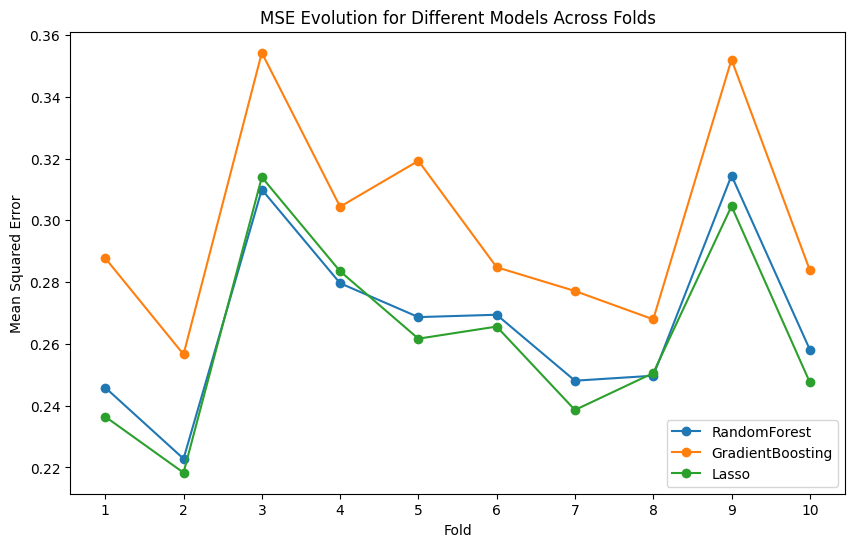

In [7]:
##ctors : cast : find best profile for each of the top 4 roles (sex, number of movies played in, age)

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import model_selection   


df =  pd.read_csv('../Datasets/cast_processed.csv')
df.dropna(inplace=True)
#df = df[df['Successful'] >= 5.5]


# Handling missing values (imputing with median)
#df.fillna(df.median(), inplace=True)

# Feature Engineering
# Convert Release_Date to datetime and calculate actors' age
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%Y')
current_year = pd.to_datetime('now').year

##x=[current_year-int(y) for y in df['role_1_birth_year'] if not(y== '\\N') ]
#print(x)
   
df['role_1_age'] = pd.to_numeric(df['Release_Date'], errors='coerce') - pd.to_numeric(df['role_1_birth_year'], errors='coerce')
df['role_2_age'] = pd.to_numeric(df['Release_Date'], errors='coerce') - pd.to_numeric(df['role_2_birth_year'], errors='coerce')
df['role_3_age'] = pd.to_numeric(df['Release_Date'], errors='coerce')- pd.to_numeric(df['role_3_birth_year'], errors='coerce')
df['role_4_age'] =pd.to_numeric(df['Release_Date'], errors='coerce') - pd.to_numeric(df['role_4_birth_year'], errors='coerce')

# Encode categorical data
label_encoder = LabelEncoder()
#Label encdoer veut une sequence de input uniforme selon le type
df['role_1_sex'] = df['role_1_sex'].astype(str)
df['role_2_sex'] = df['role_2_sex'].astype(str)
df['role_3_sex'] = df['role_3_sex'].astype(str)
df['role_4_sex'] = df['role_4_sex'].astype(str)


df['role_1_sex'] = label_encoder.fit_transform(df['role_1_sex'])
df['role_2_sex'] = label_encoder.fit_transform(df['role_2_sex'])
df['role_3_sex'] = label_encoder.fit_transform(df['role_3_sex'])
df['role_4_sex'] = label_encoder.fit_transform(df['role_4_sex'])


# Selecting features and target
features = df[['role_1_age', 'role_2_age', 'role_3_age', 'role_4_age',
               'role_1_roles_count', 'role_2_roles_count', 'role_3_roles_count', 'role_4_roles_count',
               'role_1_sex', 'role_2_sex', 'role_3_sex', 'role_4_sex']]
target = df['Successful']

features.dropna(inplace=True)
#alignment but there is a loss of around 3K 
target = target.loc[features.index]


# Splitting data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": XGBRegressor(random_state=42),
    #"LinearRegression": LinearRegression(),
    "Lasso": Lasso(random_state=42),
    #"SVM": SVR()
}
scores = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    scores[model_name] = np.mean(cv_scores)

# Find the best model
best_model_name = max(scores, key=scores.get)
best_model = models[best_model_name]

# Train and evaluate the best model
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print(f"Best Model: {best_model_name}")
print(f"Mean Squared Error on Test Set: {mse}")

# Model Training
# Using Random Forest Regressor as an example
#rf = RandomForestRegressor(random_state=42)
#df.fit(X_train_scaled, y_train)

# Predicting and Evaluating
#y_pred = rf.predict(X_test_scaled)
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2
if str(best_model_name) == "LinearRegression" or str(best_model_name) == "Lasso":
    importances = np.abs(best_model.coef_)
else:
    importances = best_model.feature_importances_
feature_names = features.columns

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#print(importance_df)


kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

# Dictionary to store MSE values for each model at each fold
model_mse = {name: [] for name in models.keys()}

# Perform cross-validation
for train_index, test_index in kf.split(X_train_scaled):
    X_train_cv, X_test_cv = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    for name, model in models.items():
        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_test_cv)
        mse = mean_squared_error(y_test_cv, y_pred_cv)
        model_mse[name].append(mse)

# Plotting the MSE evolution for each model
plt.figure(figsize=(10, 6))
for name, mse_scores in model_mse.items():
    plt.plot(range(1, 11), mse_scores, marker='o', label=name)

plt.title("MSE Evolution for Different Models Across Folds")
plt.xlabel("Fold")
plt.ylabel("Mean Squared Error")
plt.xticks(range(1, 11))
plt.legend()
plt.show()


#Directors : find best profile for a director (age, number of movies directed)

In [ ]:
feature_importances = rf.feature_importances_
features = X_train.columns  # The names of your features
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Assuming your feature names are like 'role_1_age', 'role_1_roles_count', 'role_1_sex', etc.
roles = ['role_1', 'role_2', 'role_3', 'role_4']
profiles = {}

for role in roles:
    role_features = importance_df[importance_df['Feature'].str.startswith(role)]
    profiles[role] = role_features.sort_values(by='Importance', ascending=False)

# Print out the profiles
for role, profile in profiles.items():
    print(f"{role} Profile:")
    print(profile)
    print()


role_1 Profile:
              Feature  Importance
4  role_1_roles_count    0.110948
0          role_1_age    0.106303
8          role_1_sex    0.010743

role_2 Profile:
              Feature  Importance
5  role_2_roles_count    0.126003
1          role_2_age    0.108902
9          role_2_sex    0.013164

role_3 Profile:
               Feature  Importance
6   role_3_roles_count    0.135750
2           role_3_age    0.109378
10          role_3_sex    0.013822

role_4 Profile:
               Feature  Importance
7   role_4_roles_count    0.133407
3           role_4_age    0.117965
11          role_4_sex    0.013615



Reverse 
-In the code above we trained rf model such that it can predicts success rate based on thses features 

In [ ]:
import numpy as np
import random

# Define initial guess for each role
initial_guess = {
    'role_1': {'age': 0, 'roles_count': 0, 'sex': 'M'},
    'role_2': {'age': 30, 'roles_count': 10, 'sex': 'M'},
    'role_3': {'age': 30, 'roles_count': 10, 'sex': 'M'},
    'role_4': {'age': 30, 'roles_count': 10, 'sex': 'M'}
}

# Define ranges for age and roles_count
age_range = range(10, 90)  # Age from 20 to 70
role_count_range = range(1, 150)  # Role count from 1 to 100
sex_range = ['M', 'F']  # Male and Female

def optimize_profiles(model, initial_guess, iterations=1000):
    best_profile = initial_guess.copy()
    best_score = -np.inf

    for _ in range(iterations):
        current_profile = best_profile.copy()

        # Randomly adjust one of the parameters in one of the roles
        role_to_adjust = random.choice(list(current_profile.keys()))
        feature_to_adjust = random.choice(list(current_profile[role_to_adjust].keys()))

        if feature_to_adjust == 'age':
            current_profile[role_to_adjust]['age'] = random.choice(age_range)
        elif feature_to_adjust == 'roles_count':
            current_profile[role_to_adjust]['roles_count'] = random.choice(role_count_range)
        elif feature_to_adjust == 'sex':
            current_profile[role_to_adjust]['sex'] = random.choice(sex_range)

        # Convert the current profile to a format suitable for the model
        # This conversion will depend on how your model expects the input
        model_input = convert_profile_to_model_input(current_profile)

        # Predict the success rate
        success_rate = model.predict([model_input])[0]

        # Update best profile if current is better
        if success_rate > best_score:
            best_score = success_rate
            best_profile = current_profile

    return best_profile, best_score

def convert_profile_to_model_input(profile):
    # Convert the profile dictionary to a list or array in the order expected by the model
    # This function needs to be defined based on how your model expects the input
    # For example:
    model_input = []
    for role, features in profile.items():
        model_input.append(features['age'])
        model_input.append(features['roles_count'])
        model_input.append(1 if features['sex'] == 'M' else 0)  # Assuming sex is binary and encoded as 1/0
    return model_input


optimized_profile, optimized_score = optimize_profiles(rf, initial_guess, iterations=5000)

# Print the optimized profile and score
print("Optimized Profile:", optimized_profile)
print("Optimized Predicted Success Rate:", optimized_score)


Optimized Profile: {'role_1': {'age': 68, 'roles_count': 54, 'sex': 'M'}, 'role_2': {'age': 66, 'roles_count': 19, 'sex': 'F'}, 'role_3': {'age': 28, 'roles_count': 2, 'sex': 'M'}, 'role_4': {'age': 60, 'roles_count': 106, 'sex': 'M'}}
Optimized Predicted Success Rate: 7.523999999999994


In [1]:
import numpy as np
import random

# Define initial guess for each role
initial_guess = {
    'role_1': {'age': 0, 'roles_count': 0, 'sex': 'M'},
    'role_2': {'age': 30, 'roles_count': 10, 'sex': 'M'},
    'role_3': {'age': 30, 'roles_count': 10, 'sex': 'M'},
    'role_4': {'age': 30, 'roles_count': 10, 'sex': 'M'}
}

# Define ranges for age and roles_count
age_range = range(10, 90)  # Age from 20 to 70
role_count_range = range(1, 150)  # Role count from 1 to 100
sex_range = ['M', 'F']  # Male and Female

def optimize_profiles(model, initial_guess, iterations=1000):
    best_profile = initial_guess.copy()
    best_score = -np.inf

    for _ in range(iterations):
        current_profile = best_profile.copy()

        # Randomly adjust one of the parameters in one of the roles
        role_to_adjust = random.choice(list(current_profile.keys()))
        feature_to_adjust = random.choice(list(current_profile[role_to_adjust].keys()))

        if feature_to_adjust == 'age':
            current_profile[role_to_adjust]['age'] = random.choice(age_range)
        elif feature_to_adjust == 'roles_count':
            current_profile[role_to_adjust]['roles_count'] = random.choice(role_count_range)
        elif feature_to_adjust == 'sex':
            current_profile[role_to_adjust]['sex'] = random.choice(sex_range)

        # Convert the current profile to a format suitable for the model
        # This conversion will depend on how your model expects the input
        model_input = convert_profile_to_model_input(current_profile)

        # Predict the success rate
        success_rate = model.predict([model_input])[0]

        # Update best profile if current is better
        if success_rate > best_score:
            best_score = success_rate
            best_profile = current_profile

    return best_profile, best_score

def convert_profile_to_model_input(profile):
    # Convert the profile dictionary to a list or array in the order expected by the model
    # This function needs to be defined based on how your model expects the input
    # For example:
    model_input = []
    for role, features in profile.items():
        model_input.append(features['age'])
        model_input.append(features['roles_count'])
        model_input.append(1 if features['sex'] == 'M' else 0)  # Assuming sex is binary and encoded as 1/0
    return model_input


optimized_profile, optimized_score = optimize_profiles(rf, initial_guess, iterations=5000)

# Print the optimized profile and score
print("Optimized Profile:", optimized_profile)
print("Optimized Predicted Success Rate:", optimized_score)


NameError: name 'rf' is not defined

Purpose of the random search algorithm is to find best combination of feature that maximisze success rate 